In [1]:
!pip install opencv-python

In [3]:
# Pra rodar em casa
import sys
sys.path.append("/home/pedro/miniconda3/lib/python3.9/site-packages")

In [2]:
import cv2

image = cv2.imread('img.jpg', 0)
h, w = image.shape
print (h, w)

for i in range(h):
    for j in range(w):
        if( image[i][j] > 128):
            print ('.', end='')
        else:
            print ('1', end='')
    print('\n', end='')



40 42
........................1111111111........
...................1111111111111111.......
..................111111111111111111......
................111111111111111111111.....
...............11111111111111111111111111.
.............11111111111........1111111111
............1111111111..........1111111111
............11111111...........1111111111.
...........11111111.........111111111111..
...........111111........111111111111.....
...........111111........11111111111......
...........11111......111111111111........
..........111111.....1111111111...........
..........111111...1111111111.............
..........1111111.1111111111..............
..........111111111111111.................
...........1111111111111..................
...........11111111111....................
...........1111111111.....................
...........11111111.......................
..........111111111.......................
..........111111111.......................
........11111111111.......................
.....

In [3]:
import matplotlib.pyplot as plt

In [4]:
def horizontal_histogram(image):
    h, w = image.shape
    hist = [0] * h
    for i in range(h):
        for j in range(w):
            if image[i][j] <= 128:
                hist[i] += 1
    return hist

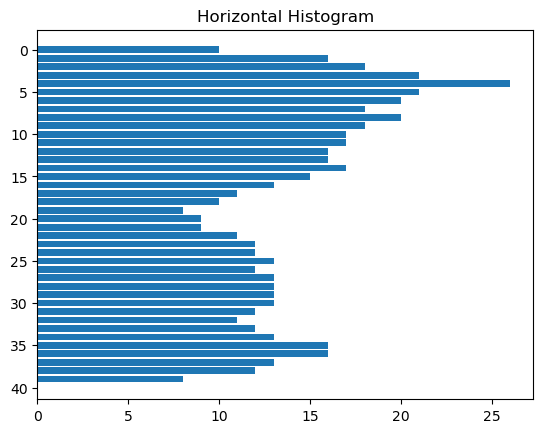

In [5]:
plt.barh(range(h), horizontal_histogram(image))
plt.gca().invert_yaxis()
plt.title("Horizontal Histogram")
plt.show()

In [6]:
def vertical_histogram(image):
    h, w = image.shape
    hist = [0] * w
    for i in range(w):
        for j in range(h):
            if image[j][i] <= 128:
                hist[i] += 1
    return hist

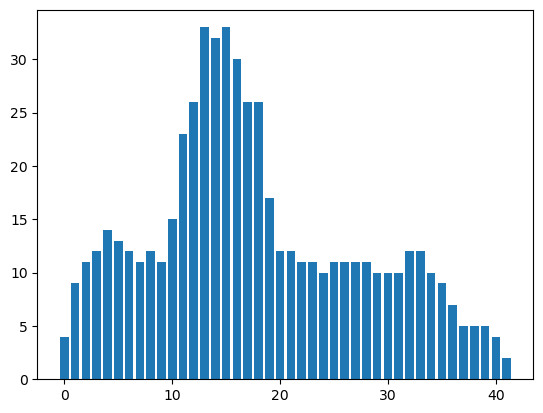

In [7]:
plt.bar(range(w), vertical_histogram(image))
plt.show()

In [ ]:
def conv(image, kernel):
    h, w = image.shape
    new_image = []
    for i in range(h):
        new_image.append([])
        for j in range(w):
            new_value = 0
            new_value += kernel[1][1] * image[i][j]
            if i != h-1:
                new_value += kernel[2][1] * image[i+1][j]
            if j != w-1:            
                new_value += kernel[1][2] * image[i][j+1]
            if i != h-1 and j != w-1:
                new_value += kernel[2][2] * image[i+1][j+1]
            if j >= 1:
                new_value += kernel[1][0] * image[i][j-1]
                if i != h-1:
                    new_value += kernel[2][0] * image[i+1][j-1]
            if i >= 1:
                new_value += kernel[0][1] * image[i-1][j]
                if j != w-1:
                    new_value += kernel[0][2] * image[i-1][j+1]
            if i >= 1 and j >= 1:
                new_value += kernel[0][0] * image[i-1][j-1]
            if new_value > 255:
                new_value = 255
            if new_value < 0:
                new_value = 0
            new_image[i].append(new_value)
    return new_image

In [ ]:
kernel = [[-1, -1, -1], [0, 0, 0], [1, 1, 1]]
convoluted_img = conv(image, kernel)

In [ ]:
kernel = [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]
convoluted_img = conv(image, kernel)

In [ ]:
for i in range(h):
    for j in range(w):
        if( convoluted_img[i][j] <= 128):
            print ('.', end='')
        else:
            print ('1', end='')
    print('\n', end='')

In [ ]:
cv2.imshow("img", horizontal_conv(image))
cv2.waitKey(0)

In [ ]:
image.shape

In [11]:
cv2.resize(image, (40, 40))

array([[255, 254, 253, ..., 254, 255, 254],
       [255, 254, 254, ..., 254, 254, 252],
       [255, 252, 253, ..., 254, 254, 254],
       ...,
       [255, 255, 255, ..., 253, 252, 255],
       [255, 255, 255, ..., 254, 255, 254],
       [255, 255, 255, ..., 254, 253, 254]], dtype=uint8)

In [16]:
f = open("digits/files.txt", "r")
count = 0
features = []
i = 0
for x in f:
    features.append([])
    image = cv2.imread("digits/" + x.split()[0], 0)
    image = cv2.resize(image, (40, 40))
    h, w = image.shape
    features[i].append(' '.join(str(e) for e in horizontal_histogram(image))
    features[i].append(' '.join(str(e) for e in vertical_histogram(image))
    features[i].append(str(x.split()[1]))
    #    for i in range(h):
    #        for j in range(w):
    #            if( image[i][j] > 128):
    #                print ('.', end='')
    #            else:
    #                print ('1', end='')
    #        print('\n', end='')
    count += 1
    #print(x.split()[0])
    #print(x.split()[1])


SyntaxError: invalid syntax (2350983388.py, line 11)

In [15]:
' '.join(str(ele) for ele in horizontal_histogram(image))

'9 20 25 31 29 22 19 18 17 15 16 18 19 23 26 26 29 27 18 8 7 8 8 8 7 8 8 6 7 6 6 6 6 8 6 6 7 8 12 6'

In [ ]:
data[1]